<h1>Module 8: Nonlinear Regression and Fourier Analysis</h1>

<p>Data available at
http://scrippsco2.ucsd.edu/data/atmospheric_co2/sampling_stations</p>

<h2>#1 Linear Regression Analysis</h2>

<strong>Regression Analysis of the Keeling Curve</strong>
<br/>In this exercise, we will be using a linear regression to fit our data with our simple parabolic model. The data of column one represents time measurements, while column two is for $CO_2$ measurements in ppm. 


<strong>Part 1.</strong> Load the data as a pandas array. In the next cell we are using pandas to load a data file called mlo_station_data_set/monthly_in_situ_co2_mlo.csv. Be sure to check your datafile by opening it, and then after reading it in pandas. 

In [2]:
import numpy as np
import pylab as pl
from numpy import fft
import datetime as dt

import pandas as pd
data = pd.read_csv('weekly_in_situ_co2_mlo.csv', sep=",",comment='"',)
data.columns = ['dates', 'co2_ppm']
data.index = data['dates'] 
# We need to convert our dates to seconds
data['dates'] = (pd.to_datetime(data['dates']) - dt.datetime(1951,1,1)).dt.total_seconds() 



<p><strong>Part 2.</strong> Write a python function called parabola for the expression: $X(t) = (m*t + b)^2 + X_{min}$ Your function should include a four arguments, one for an array of times and three for the parameters m (slope), b (intercept) and x_min (the minimum value of your dataset). </p>
<p>Be sure to save your function in a file that will be imported in your final plotting script.</p>

<p><strong>Part 3.</strong> Our next step is to create a linear regression in python. The procedure is relatively simple, once your data has been loaded. The first step is to linearize your data. Think about how you would perform this step mathematically.  Hint: set $m*x + b$ equal to your $y^2$, or data squared. <a href="http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html"> You can read the SciPy documentation for stats.linregress here.</a></p>
<p>Once you have the slope and intercept for your linear fit, you will have to perform the inverse mathematical operation to convert your data back into an parabolic function. Plot this "quadratic model" found by linear regression against your data. The model should appear as a solid red line, and the data as black points. <a href="http://matplotlib.org/users/screenshots.html">Documentation may be found here.</a></p>

In [3]:
%matplotlib inline
%run 'parabola.py'
from scipy import stats
xdata = data['dates']# This is the independent variable and can be used without transformation
ydata = np.sqrt(data['co2_ppm'] - data['co2_ppm'].min()) # You'll need to transform this data to a linear trend. 
[m,b,r,p,sterr] = stats.linregress(xdata, ydata) # What do m, b, r, p and sterr mean?
print(m,b,r,p,sterr) 


y = parabola(data['dates'],m,b,data['co2_ppm'].min())
pl.plot(data['dates'],data['co2_ppm'],'k-', data['dates'],y,'r-')


ERROR:root:File `'parabola.py'` not found.


4.25484422877e-09 0.889172211429 0.991882952701 0.0 9.92053539589e-12


NameError: name 'parabola' is not defined

1.37849881375e-10 5.70166411729 0.991958116861 0.0 3.19899062924e-13
[  1.27994321e-17   1.88466072e-08   3.09504104e+02]


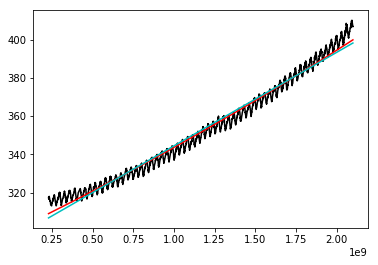

In [4]:
%matplotlib inline

def exponential(t,m,b):
    return np.exp(m*t+b)

from scipy import stats
xdata = data['dates']# This is the independent variable and can be used without transformation
ydata = np.log(data['co2_ppm']) # You'll need to transform this data to a linear trend. 
[m,b,r,p,sterr] = stats.linregress(xdata, ydata) # What do m, b, r, p and sterr mean?
[m2,b2,r2,p2,sterr2] = stats.linregress(xdata, data['co2_ppm'])
print(m,b,r,p,sterr) 
p = np.polyfit(data['dates'], data['co2_ppm'], 2)
print(p)

y = exponential(data['dates'],m,b)
pl.plot(data['dates'],data['co2_ppm'],'k-', data['dates'],y,'r-', data['dates'],m2*xdata+b2,'c-')
pl.savefig('fits.png',dpi=1000)



<p><strong>Part 4.</strong> Use your model to predict future values of $CO_2$ concentrations in 1, 10 and 100 years.  Are these values reasonable in your opinion?

<h2>#2 Nonlinear Regression</h2>
<p><strong>Part 1.</strong> Write an <em>external</em> python function with filename exponential.py for the expression: $X(t) = X(t_0)e^{at}$ Your function should include a three arguments, one for an array of times and two for the parameters a, rate constant, and x_0, your initial condition. Hint, <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html">See the documentation of numpy arrays here.</a> </p>


<p><strong>Part 2.</strong> Since we have a good idea our data, exponential.txt, follows an exponential relationship, we can use a nonlinear fit. <a href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html" >In SciPy the optimize module has a curve fit function</a>. The advantage of a non-linear fit is that our data does not need to be linearized in advance.</p> 
<p>Once you have the estimated parameters for you nonlinear fit, plot this "exponential model" against your data. The model should appear as a solid line, and the data as points.</p>
<p>Repeat this procedure with the Keeling Curve.</p>

<h2>#3 Fourier Analysis</h2>

<strong>Fourier Analysis of the Keeling Curve</strong>
<br/>In this exercise, we will be using a fast fourier transform (fft) to fit our data with our more complex harmonic model. Documentation on the fft can be found here: https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html 

<p><strong>Part 1.</strong> The following code is provided for your analysis. Try to determine what is going on in the code. To do this, you'll want to change the number of harmonics from 40 to some greater number. What happens? If you make zero predictions (currently set at 740) when calling the function, it will print out the residual between your data and the model. As the residual decreases, your model fits the data better. Are there any noteable trends in your fit?</p>

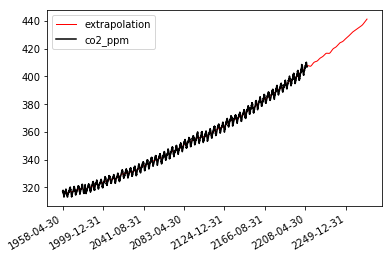

In [7]:
import numpy as np
import pylab as pl
from numpy import fft
from matplotlib.ticker import Formatter

import pandas as pd
data = pd.read_csv('weekly_in_situ_co2_mlo.csv', sep=",",comment='"',)
data.columns = ['dates', 'co2_ppm']
data['dates'] = pd.to_datetime(data['dates'])
data.index = data['dates'] 


class MyFormatter(Formatter):
    def __init__(self, dates, fmt='%Y-%m-%d'):
        self.dates = dates
        self.fmt = fmt

    def __call__(self, x, pos=0):
        'Return the label for time x at position pos'
        ind = int(np.round(x))
        if ind >= len(self.dates) or ind < 0:
            return ''

        return self.dates[ind].strftime(self.fmt)
    
formatter = MyFormatter(data['dates'])

def fourierExtrapolation(x, n_predict, n_harm):
    n = x.size
    t = np.arange(0, n)
    p = np.polyfit(t, x, 2)         # find linear trend in x
    x_notrend = x - p[0] * t**2 - p[1]*t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t**2 + p[1]*t
    
    
def main(x, dates, n_predict, n_harm):
    extrapolation = fourierExtrapolation(x, n_predict, n_harm)

    datesize = np.shape(dates)
    newdates = pd.PeriodIndex(freq='m', start=dates.min(), periods=n_predict+datesize[0])
    formatter = MyFormatter(newdates)
    
    fig, ax = pl.subplots()
    ax.xaxis.set_major_formatter(formatter)
    fig.autofmt_xdate()

    pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation', linewidth='1')
    pl.plot(np.arange(0, x.size), x, 'k', marker='.', markersize='0.01')
    if n_predict == 0:
        residual = np.sqrt(sum((extrapolation - x)**2))
        print(residual)
    pl.legend()
    pl.show()
    
# This is where we call our function... The inputs are to be decided by you.    
if __name__ == "__main__":
    main(data['co2_ppm'][0:],data['dates'][0:], 740, 40)

<h2>Exercises</h2>

<p>Go to the NOAA El Niño Southern Oscillation page and download the data for the Southern Oscillation Index (SOI) in either JSON or csv format. https://www.ncdc.noaa.gov/teleconnections/enso/indicators/soi/. Conduct the fourier analysis above on this data. Note, you'll need to work with the data a bit, which means you should take a look at it and possibly erase lines or titles that prevent it from being read by pandas. You'll also want to strip out the date formatting code unless you change the dates to include the first day of the month for each data point. Once you have a successful fit, use your model to predict the date range for the next El Niño and La Niña events, how strong does your model predicted them to be?</p>
